## Simulazione II Esame di Metodi Numerici Soluzioni##

Nel file ``Test_I.mat`` sono memorizzate le matrici A1, A2 ed A3 ed i vettori b1,b2,b3. 
- Risolvere i 3 sistemi lineari aventi matrice dei coefficienti A1 e termine noto b1, matrice dei coefficienti A2 e termine noto b2, matrice dei coefficienti A3 e terimine noto b3  utilizzando il metodo più adatto per ciascuno di essi e  commentare i risultati ottenuti  giustificandoli alla luce della teoria.

                                                                                            punti 12
                                                                                            
- Verificare se le matrici sono malcondizionate. Indicare la formula matematica dell'indice di condizionamento e spiegare perchè è importante conoscere l'indice di condizionamento di una matrice.
                                                                                           
                                                                                           punti 2

- Dopo aver copiato nel numpy array b1p il termine noto b1 del primo sistema lineare con matrice dei coefficienti A1, effettuarne una perturbazione della prima componente nel seguente modo b1p[0]=b1p[0]+0.001*b1p[0]. Risolvere il sistema lineare con matrice A1 e termine noto perturbato b1p. Calcolare l'errore relativo sulla soluzione e l'errore relativo sul termine noto, descrivere ciò che si verifica giustificandolo alla luce della teoria.

                                                                                           punti 2


Per la lettura dei dati procedere nel seguente modo:

``from scipy.io import loadmat``

``import numpy as np``

``dati = loadmat('Test_II.mat')``

``A1=dati["A1"] ``

``A1=A1.astype(float)``

`` b1=dati["b1"] ``

`` b1=b1.astype(float)``

``A2=dati["A2"] ``

``A2=A2.astype(float)``

`` b2=dati["b2"] ``

`` b2=b2.astype(float)``

``A3=dati["A3"] ``

``A3=A3.astype(float)``

`` b3=dati["b3"] ``

`` b3=b3.astype(float)``



                                                                    Punti 16

In [24]:
from scipy.io import loadmat
import scipy
import numpy as np
import SolveTriangular

In [35]:
def is_simmetrica(A):
    return np.all(A.T==A)

def is_def_pos(A):
    autoval=np.linalg.eigvals(A)
    return np.all(autoval>0)

def is_sparsa(A):
    m,n=A.shape
    nz=np.count_nonzero(A)
    p=(nz/(n*m))*100
    return p<33

def rank(A):
    m=A.shape[1]
    return np.linalg.matrix_rank(A)==m

def is_diagonal_dominant(A):
    n=A.shape[0]
    sum=-1
    for i in range(n):
        for j in range(n):
            if i!=j:
                sum=np.sum(abs(A[i,j]))
        if abs(A[i,i])<=sum:
            return False
    return True

In [56]:
import scipy.linalg


dati = loadmat('Test_I.mat')
A1=dati["A1"]
A1=A1.astype(float)
b1=dati["b1"]
b1=b1.astype(float)
m,n=A1.shape

if is_sparsa(A1):
    print("matrice sparsa, di dimensioni",m,"x",n)
else:
    print("matrice densa, di dimensioni",m,"x",n)

if is_def_pos(A1):
    print("matrice definita positiva")

if rank(A1):
    print("ha rango massimo")

print(np.linalg.det(A1)!=0)
print(np.linalg.cond(A1)) #matrice mediamente mal condizionata 


# piccole dimesioni e densa, 

PT,L,U=scipy.linalg.lu(A1)
P=PT.T
y, flag= SolveTriangular.Lsolve(L,P@b1)
x,flag=SolveTriangular.Usolve(U,y)
print(x)

b1p=b1.copy()
b1p[0]=b1p[0]+0.001*b1p[0]
y, flag= SolveTriangular.Lsolve(L,P@b1p)
xp,flag=SolveTriangular.Usolve(U,y)

print((np.linalg.norm(b1p-b1)/np.linalg.norm(b1))*100)
print((np.linalg.norm(xp-x)/np.linalg.norm(x))*100)
#una piccola perturbazione sui dati provoca una perturbazione più grande sulla soluzione dato che la matrice è mediamente mal condizionata

matrice densa, di dimensioni 10 x 10
ha rango massimo
True
120.6148722322323
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
0.033571399214796724
1.1286868660940812


In [40]:
def qrLS(A,b):
#Risolve un sistema sovradeterminato con il metodo QR-LS
    n=A.shape[1]  # numero di colonne di A
    Q,R=scipy.linalg.qr(A)
    h=Q.T@b
    x,flag=SolveTriangular.Usolve(R[0:n,:],h[0:n])
    residuo=np.linalg.norm(h[n:])**2
    return x,residuo

In [41]:
A2=dati["A2"]
A2=A2.astype(float)
b2=dati["b2"]
b2=b2.astype(float)
m,n=A2.shape
    
if is_sparsa(A2):
    print("matrice sparsa, di dimensioni",m,"x",n)
else:
    print("matrice densa, di dimensioni",m,"x",n)

print(np.linalg.cond(A2)) #matrice mal condizionata

if rank(A2):
    print("ha rango massimo")

x,res=qrLS(A2,b2)
print(x)


## sistema sovradeterminato, matrice mal condizionata e di rango massimo --> QRLS

matrice densa, di dimensioni 25 x 10
10000.00000000046
ha rango massimo
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [48]:
def conjugate_gradient(A,b,x0,itmax,tol):
    n,m=A.shape
    if n!=m:
        print("Matrice non quadrata")
        return [],[]
    
    
   # inizializzare le variabili necessarie
    x = x0
    r = A@x-b
    p = -r
    it = 0
    nb=np.linalg.norm(b)
    errore=np.linalg.norm(r)/nb
    vec_sol=[]
    vec_sol.append(x0)
    vet_r=[]
    vet_r.append(errore)
# utilizzare il metodo del gradiente coniugato per calcolare la soluzione
    while errore >= tol and it< itmax:
        it=it+1
        Ap=A@p
        alpha = -(r.T@p)/(p.T@Ap)
        x = x+alpha*p
        vec_sol.append(x)
        rtr_old=r.T@r
        r=r+alpha*Ap
        gamma= (r.T@r)/rtr_old
        errore=np.linalg.norm(r)/nb
        vet_r.append(errore)
        p = -r+gamma*p
   
    
    return x,vet_r,vec_sol,it

In [53]:
A3=dati["A3"] 
A3=A3.astype(float)
b3=dati["b3"]
b3=b3.astype(float)
m,n=A3.shape

if is_sparsa(A3):
    print("matrice sparsa, di dimensioni",m,"x",n)
else:
    print("matrice densa, di dimensioni",m,"x",n)

if is_def_pos(A3):
    print("matrice definita positiva")

if rank(A3):
    print("ha rango massimo")

if is_simmetrica(A3):
    print("matrice simmetrica")

if is_diagonal_dominant(A1):
    print("diagonale strettamente dominante")

print(np.linalg.cond(A3)) #matrice ben condizionata (circa 10^2)
x0=np.zeros_like(b3)
x,vet_r,vec_sol,it = conjugate_gradient(A3,b3,x0,1500, 1e-11)
print(x)
# grandi dimensioni e sparsa, matrice simmetrica e def positiva --> gradiente 


matrice sparsa, di dimensioni 225 x 225
matrice definita positiva
ha rango massimo
matrice simmetrica
103.0868689198171
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.

La formula matematica dell'indice di condizionamento di unamatrice è data da $K(A)=||A|||A^{-1}||$, esso rappresenta un fattore di amplificazione dell'errore dei dati sulla soluzione. Indice di condizionamento elevato significa che piccole perturbazioni sui dati producono grandi perturbazioni sui risultati.  

## Esercizio 2 ##

Per ogni $k \in N$ l'equazione di II grado $x^2+(2^{2k}-3^{-2k})x-2^{2k}3^{-2k}=0 $ ha come soluzioni esatte $x_1=-2^{2k}$,$x_2=3^{-2k}$,

Scrivere lo script python in cui
- si implementa la formula risolutiva delle equazioni di II grado per calcolare le  due soluzioni per $k$ che  assume valori interi tra 6 e 16;  [**Punti 2**]

In [79]:
k=np.linspace(6.0,16.0,11)
a=1
b=2**(2*k)-3**(-2*k)
c=-2**(2*k)*3**(-2*k)

x1=(-b+np.sqrt(b**2-4*a*c))/(2*a)
x2=(-b-np.sqrt(b**2-4*a*c))/(2*a)
print(x1)
print(x2)

[1.88167633e-06 2.09074642e-07 2.32284947e-08 2.57568900e-09
 2.32830644e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]
[-4.09600000e+03 -1.63840000e+04 -6.55360000e+04 -2.62144000e+05
 -1.04857600e+06 -4.19430400e+06 -1.67772160e+07 -6.71088640e+07
 -2.68435456e+08 -1.07374182e+09 -4.29496730e+09]


- per entrambe le soluzioni, si calcoli l'errore relativo commesso al variare di k che assume valori interi tra 6 e 16;   [**Punti 1**]

In [81]:
sol2=-2**(2*k)
sol1=3**(-2*k)
err1 = np.abs(x1-sol1)/np.abs(sol1)
err2 = np.abs(x2-sol2)/np.abs(sol2)
print(np.abs(x1-sol1)/np.abs(sol1)) #x2
print(np.abs(x2-sol2)/np.abs(sol2)) #x1

[5.17056833e-08 2.46841955e-06 8.94701188e-05 2.12530988e-03
 1.88169744e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


- si rappresentino in un grafico gli andamenti dei due errori relativi calcolati nel punto precedente; [**Punti 1**]

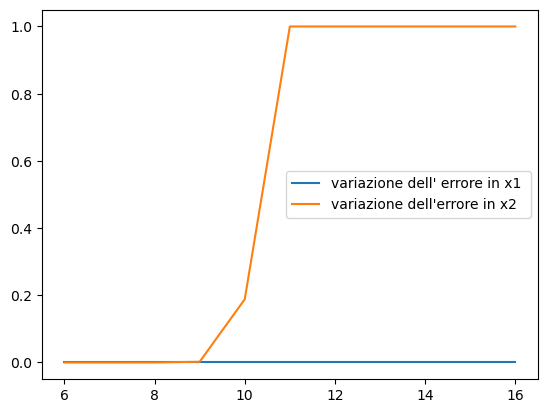

In [84]:
import matplotlib.pyplot as plt
plt.plot(k,err2, k,err1)
plt.legend(['variazione dell\' errore in x1 ', 'variazione dell\'errore in x2'])

- osservando i grafici ottenuti, si dica se le formule utilizzate per calcolare le due soluzioni hanno dato luogo ad algoritmi stabili, motivando opportunamente la risposta alla luce della teoria. [**Punti 6**]

- in caso di instabilita', si fornisca un algoritmo di calcolo stabile e si mostrino in un nuovo grafico gli
andamenti dei nuovi errori relativi ottenuti. [**Punti 6**]